<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Previsão de produção de energia elétrica nacional***
---

In [ ]:
#@title Identificação do Grupo

#@markdown Turma **7N**

#@markdown Integrantes do Grupo (*informe \<TIA\>,\<nome\>*)
Aluno = '41683358, Aline Pereira da Silva' #@param {type:"string"} 


# **Apresentação**

# Problema

Desenvolver uma solução completa de previsão de produção de energia elétrica nacional com base em dados climáticos, incluindo análise exploratória de dados, processamento e avaliação de diferentes modelos de aprendizagem de máquina com python e scikit-learn.



# Referencial Teórico


*   MELO, Carlos. Titanic: Machine Learning from Disaster. GitHub, 4 ago. 2019. Disponível em: https://github.com/carlosfab/data_science/blob/master/Titanic.ipynb. Acesso em: 1 jun. 2022.

*   TEIXEIRA, Danilo Morales. Regressão de Ridge. Regressão de Ridge: Aplicação da regressão de Ridge num dataset real sobre o consumo de combustível em diferentes carros de fabricantes diferentes. GitHub, 7 jun. 2020. Disponível em: https://github.com/danmorales/CursoDS_ProfDanilo/blob/master/Regressao/Lasso_Ridge/Regressao_Ridgde.ipynb. Acesso em: 1 jun. 2022.



# Metodologia 

Dicionário de dados:

*   **TimeStamp**: Linha do tempo 
*   **estação**: Estações climáticas do ano
*   **região**: Regiões específicas da distribuição energética
*   **Avg_precipitacao_total_hr**: Água proveniente do vapor de água
*   **Max_temperatura_máxima**: Temperatura máxima 
*   **Min_temperatura_mínima**: Temperatura mínimo 
*   **Max_umidade_rel_max**: Umidade do ar máxima
*   **Min_umidade_rel_min**: Umidade do ar mínima
*   **Sin**: Sistema integrado completo
*   **seco**: Consumo energético da região sudeste e centro oeste
*   **s**: Consumo energético da região sul
*   **ne**: Consumo energético da região nordeste
*   **n**: Consumo energético da região norte

Os dados foram separados por regiões de acordo com a região específica utilizada na distribuição energética (SECO, S, NE e N) para que os dados não fiquem muito pesados e para poder analisar a situação de cada região.

Durante o tratamento dos dados foram encontrados dados vazios, para solucionar esse problema de forma efetiva, as linhas com dados faltantes foram excluídos. 

Para realizar o tratamentos das variáveis categóricas, como no caso da estação, utilizamos o método dummies para transformar os dados em dados binários e facilitar a análise. 

Foram aplicados dois modelos para resolver a predição, o primeiro modelo, indicado pelo mentor do hackaton, foi o de árvore de decisão e  segundo foi o Ridge.




# Resultados

*Resuma aqui os resultados, principalmente incluindo tabelas e esquemas necessários.* 

# **Implementação**

# Importaçao das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr, spearmanr
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import *
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

# Base de Dados 

Exclusão das linhas que contenham dados nulos e separação da base por região da distribuição energética. 

In [ ]:
url = (r'https://raw.githubusercontent.com/alineuol/Hackaton-Itau-2022/main/HACKA09-Base%20(1).csv')
df = pd.read_csv(url, sep=';', encoding='latin-1')
df.head()

,TimeStamp,estação,região,Avg_precipitacao_total_hr,Max_temperatura_maxima,Min_temperatura_minima,Max_umidade_rel_max,Min_umidade_rel_min,seco,s,ne,n,sin
0,2013-04-01,Outono,N,0.269913,33.23000,22.34000,95.14286,44.50000,38089,11042,9697,4302,63129
1,2013-04-01,Outono,NaN,0.000000,34.80000,24.30000,72.00000,38.00000,38089,11042,9697,4302,63129
2,2013-04-01,Outono,NE,0.053967,34.38000,20.56667,90.40000,34.33333,38089,11042,9697,4302,63129
3,2013-04-01,Outono,S,0.179064,30.03333,17.32353,91.47059,52.23809,38089,11042,9697,4302,63129
4,2013-04-01,Outono,SECO,0.084376,33.24615,18.00417,96.40000,42.00000,38089,11042,9697,4302,63129


In [ ]:
df.isnull().sum()


TimeStamp                       0
estação                         0
região                       2393
Avg_precipitacao_total_hr       0
Max_temperatura_maxima          0
Min_temperatura_minima          0
Max_umidade_rel_max             0
Min_umidade_rel_min             0
seco                            0
s                               0
ne                              0
n                               0
sin                             0
dtype: int64

In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()

TimeStamp                    0
estação                      0
região                       0
Avg_precipitacao_total_hr    0
Max_temperatura_maxima       0
Min_temperatura_minima       0
Max_umidade_rel_max          0
Min_umidade_rel_min          0
seco                         0
s                            0
ne                           0
n                            0
sin                          0
dtype: int64

In [ ]:
print('Quantidade de linhas totais: ',len(df_limpo)) 

Quantidade de linhas totais:  13384


In [ ]:
df_N = df_limpo[df_limpo.região=="N"] #Região norte
df_NE = df_limpo[df_limpo.região=="NE"] #Região nordeste
df_S = df_limpo[df_limpo.região=="S"] #Região sul
df_SECO = df_limpo[df_limpo.região=="SECO"] #Região sudeste e centro oeste

## **Árvore de Decisão**

*Descreva resumidamente o modelo empregado.*


### **Árvore de Decisão:** Preparação dos Dados

Aplicação do método dummies para transformar dados categóricos em binários

1.   Item da lista
2.   Item da lista




In [ ]:
#transformando dados categóricos em dados binários
df_N_bin = pd.get_dummies(df_N["estação"]) 
df_NE_bin = pd.get_dummies(df_NE["estação"]) 
df_S_bin = pd.get_dummies(df_S["estação"]) 
df_SECO_bin = pd.get_dummies(df_SECO["estação"]) 


In [ ]:
#juntando os dados binários ao dataframe
df_N_ready = pd.concat([ df_N,df_N_bin,], axis=1)
df_NE_ready = pd.concat([df_NE, df_NE_bin], axis=1)
df_S_ready = pd.concat([df_S, df_S_bin], axis=1)
df_SECO_ready = pd.concat([df_SECO,df_SECO_bin], axis=1)

In [ ]:
#removendo colunas desnecessárias para aplicação do modelo
df_N_Dec = df_N_ready.drop(columns=['estação','região','TimeStamp'])
df_NE_Dec = df_NE_ready.drop(columns=['estação','região','TimeStamp'])
df_S_Dec = df_S_ready.drop(columns=['estação','região','TimeStamp'])
df_SECO_Dec = df_SECO_ready.drop(columns=['estação','região','TimeStamp'])


In [ ]:
#@markdown Checando variabilidade dos dados:


Variabilidade da região norte: 




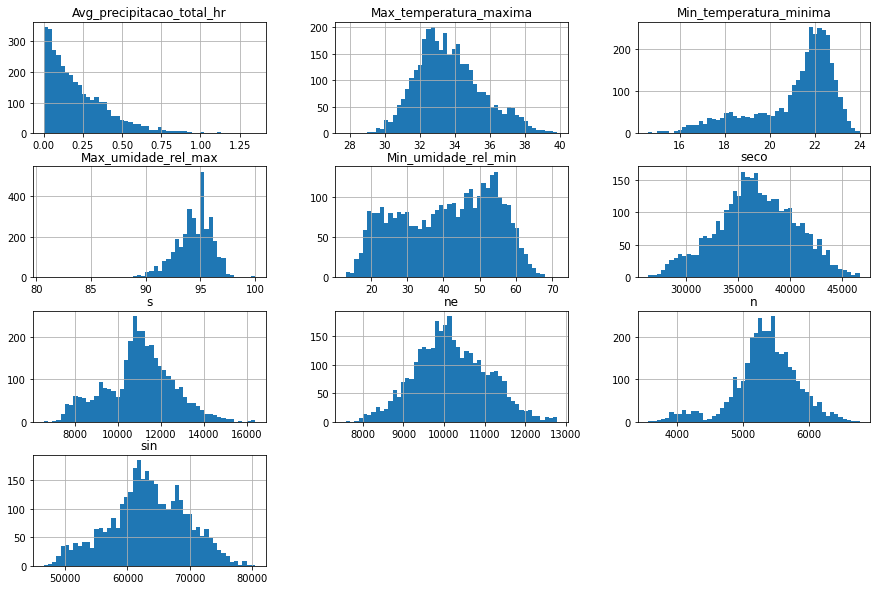


Variabilidade da região nordeste: 




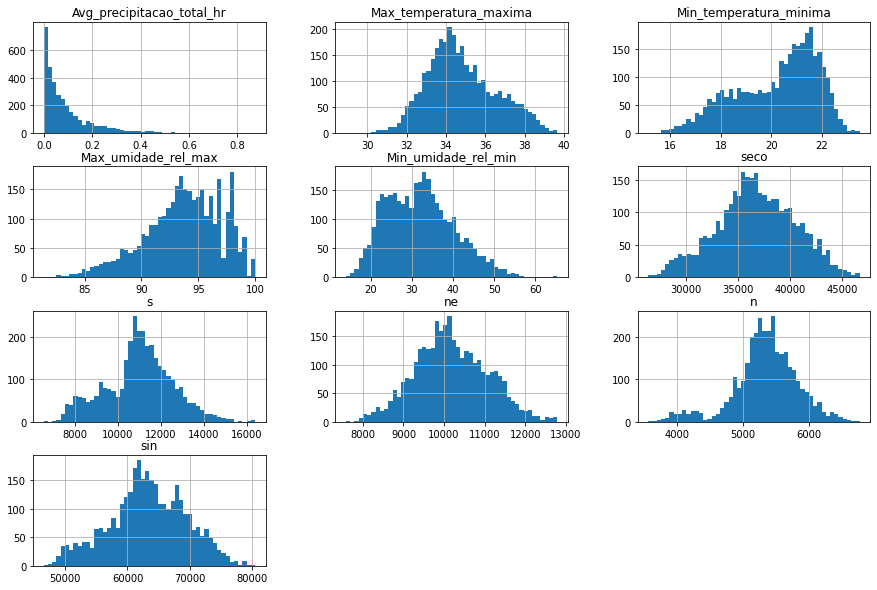


Variabilidade da região sul: 




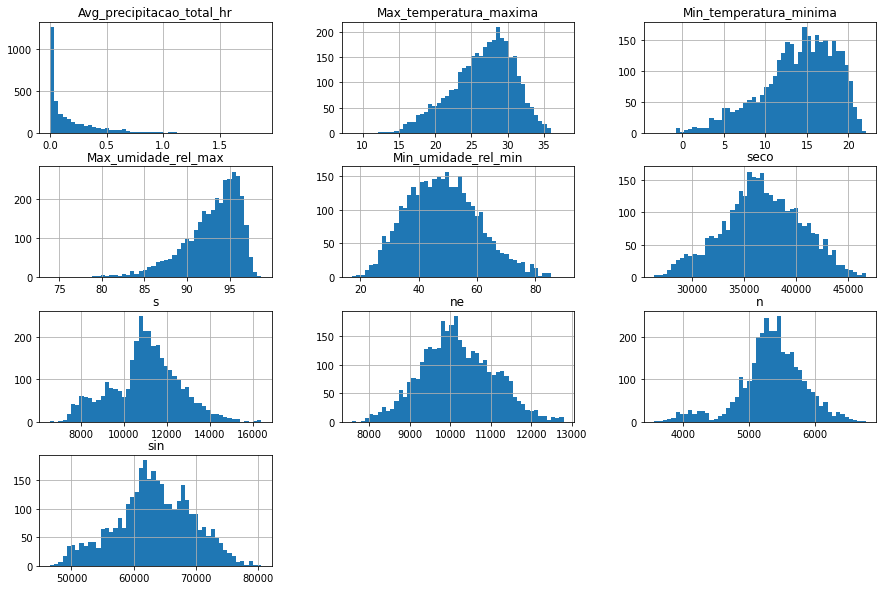


Variabilidade da região sudeste e centro oeste: 




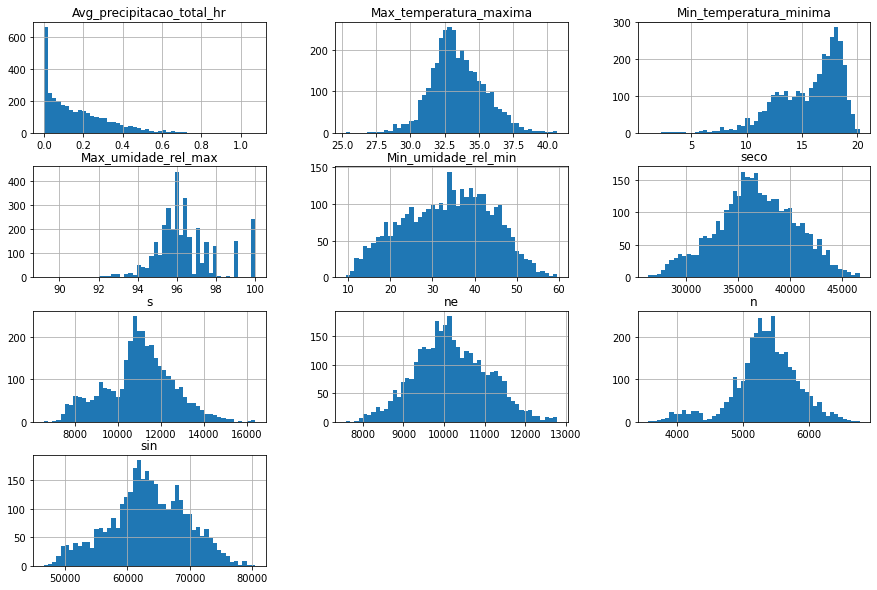

In [ ]:
print('')
print('Variabilidade da região norte: ')
print('')
print('')
df_N_Dec.drop(columns=['Inverno', 'Outono', 'Primavera', 'Verão' ]).hist(bins=50, figsize=(15,10))
plt.show()
print('')
print('Variabilidade da região nordeste: ')
print('')
print('')
df_NE_Dec.drop(columns=['Inverno', 'Outono', 'Primavera', 'Verão' ]).hist(bins=50, figsize=(15,10))
plt.show()
print('')
print('Variabilidade da região sul: ')
print('')
print('')
df_S_Dec.drop(columns=['Inverno', 'Outono', 'Primavera', 'Verão' ]).hist(bins=50, figsize=(15,10))
plt.show()
print('')
print('Variabilidade da região sudeste e centro oeste: ')
print('')
print('')
df_SECO_Dec.drop(columns=['Inverno', 'Outono', 'Primavera', 'Verão' ]).hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
#@markdown Correlação de Pearson

Variabilidade da região norte: 

Variabilidade da região nordeste: 

Variabilidade da região sul: 

Variabilidade da região sudeste e contro oeste: 


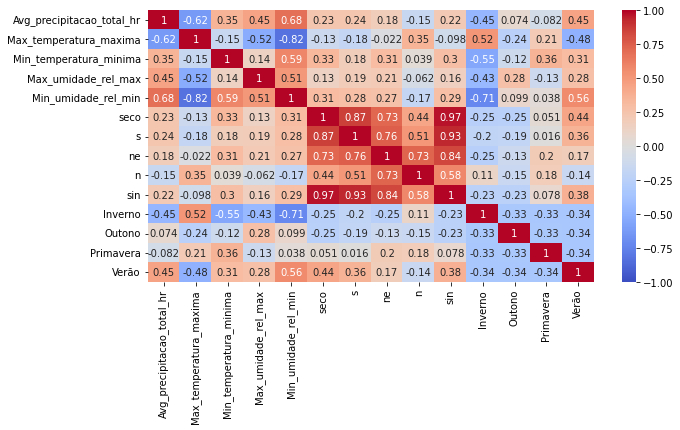

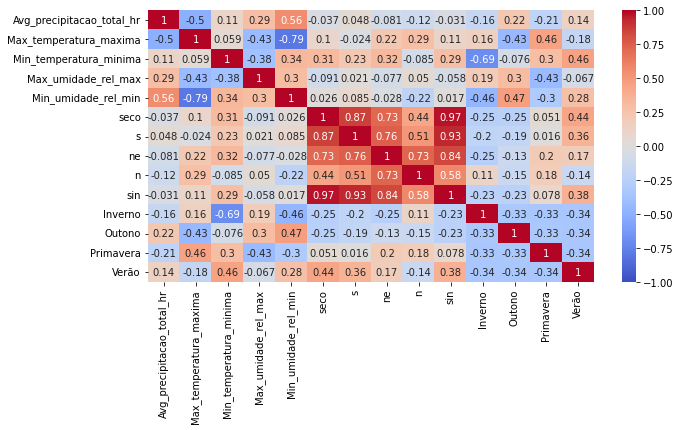

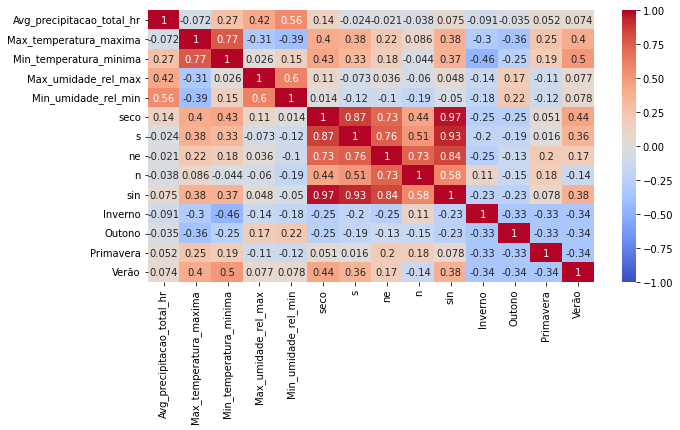

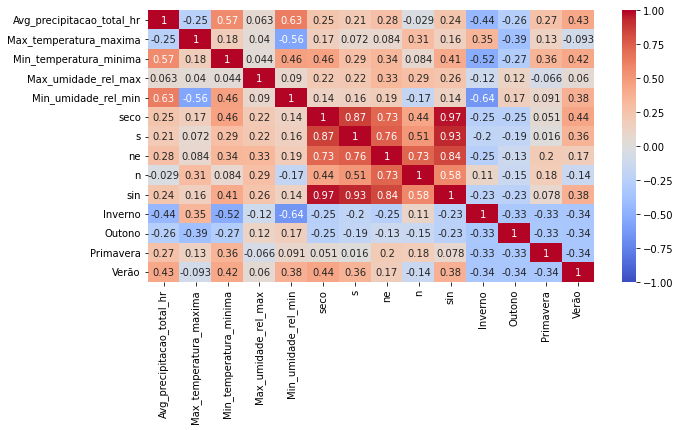

In [ ]:
print('Variabilidade da região norte: ')
plt.figure(figsize=(10,5))
corr = df_N_Dec.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm",vmin=-1,vmax=1)
print('')
print('Variabilidade da região nordeste: ')
plt.figure(figsize=(10,5))
corr = df_NE_Dec.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm",vmin=-1,vmax=1)
print('')
print('Variabilidade da região sul: ')
plt.figure(figsize=(10,5))
corr = df_S_Dec.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm",vmin=-1,vmax=1)
print('')
print('Variabilidade da região sudeste e contro oeste: ')
plt.figure(figsize=(10,5))
corr = df_SECO_Dec.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm",vmin=-1,vmax=1)

In [ ]:
df_N_Dec.Inverno = df_N_Dec.Inverno.astype(float)
df_N_Dec.Outono = df_N_Dec.Outono.astype(float)
df_N_Dec.Primavera = df_N_Dec.Primavera.astype(float)
df_N_Dec.Verão = df_N_Dec.Verão.astype(float)

df_NE_Dec.Inverno = df_NE_Dec.Inverno.astype(float)
df_NE_Dec.Outono = df_NE_Dec.Outono.astype(float)
df_NE_Dec.Primavera = df_NE_Dec.Primavera.astype(float)
df_NE_Dec.Verão = df_NE_Dec.Verão.astype(float)

df_S_Dec.Inverno = df_S_Dec.Inverno.astype(float)
df_S_Dec.Outono = df_S_Dec.Outono.astype(float)
df_S_Dec.Primavera = df_S_Dec.Primavera.astype(float)
df_S_Dec.Verão = df_S_Dec.Verão.astype(float)

df_SECO_Dec.Inverno = df_SECO_Dec.Inverno.astype(float)
df_SECO_Dec.Outono = df_SECO_Dec.Outono.astype(float)
df_SECO_Dec.Primavera = df_SECO_Dec.Primavera.astype(float)
df_SECO_Dec.Verão = df_SECO_Dec.Verão.astype(float)

### **Árvore de Decisão:** Modeloo

In [ ]:
type(df_N_Dec.ne)

method

In [ ]:
msk = np.random.rand(len(df_N_Dec)) < 0.8 # cria uma mascara com as posicoes
train1 = df_N_Dec[msk]
test1 = df_N_Dec[~msk]

msk = np.random.rand(len(df_NE_Dec)) < 0.8 # cria uma mascara com as posicoes
train2 = df_NE_Dec[msk]
test2 = df_NE_Dec[~msk]

msk = np.random.rand(len(df_S_Dec)) < 0.8 # cria uma mascara com as posicoes
train3 = df_S_Dec[msk]
test3 = df_S_Dec[~msk]

msk = np.random.rand(len(df_SECO_Dec)) < 0.8 # cria uma mascara com as posicoes
train4 = df_SECO_Dec[msk]
test4 = df_SECO_Dec[~msk]

In [ ]:
target1 = train1.n.copy()
#target2 = train2.ne.copy()
target3 = train3.s.copy()
target4 = train4.seco.copy()

In [ ]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train1, target1)

#lr_model2 = LogisticRegression(solver='liblinear')
#lr_model2.fit(train2, target2)

lr_model3 = LogisticRegression(solver='liblinear')
lr_model3.fit(train3, target3)

lr_model4 = LogisticRegression(solver='liblinear')
lr_model4.fit(train4, target4)

LogisticRegression(solver='liblinear')

### **Árvore de Decisão:** Resultados
Acurácia muito baixa para continuação da aplicaçao do modelo

In [ ]:
# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train1, target1) * 100, 2)
print("Acurácia do modelo de Regressão Logística norte: {}".format(acc_logReg))

#acc_logReg2 = round(lr_model2.score(train2, target2) * 100, 2)
#print("Acurácia do modelo de Regressão Logística nordeste: {}".format(acc_logReg2))

acc_logReg3 = round(lr_model3.score(train3, target3) * 100, 2)
print("Acurácia do modelo de Regressão Logística sul: {}".format(acc_logReg3))

acc_logReg4 = round(lr_model4.score(train4, target4) * 100, 2)
print("Acurácia do modelo de Regressão Logística sudeste e centro oeste: {}".format(acc_logReg4))

Acurácia do modelo de Regressão Logística norte: 16.58
Acurácia do modelo de Regressão Logística sul: 35.77
Acurácia do modelo de Regressão Logística sudeste e centro oeste: 47.87


## **Teste de modelos**


In [ ]:
def evaluate_models(models, kfold, X_train, y_train):
    score = list()
    for i in range(len(models)):
        score.append(cross_val_score(models[i], X_train, y_train, cv=kfold, scoring='accuracy')) 
    avg_score = list()
    for score_set in score:
        avg_score.append(np.mean(score_set))
    list_of_series = list()
    for i in range(len(score)):
      list_of_series.append(pd.Series([models[i],avg_score[i]], index=['Modelo','Score']))
    df_models = pd.DataFrame(list_of_series, columns = ['Modelo','Score'])
    return df_models  

In [ ]:
def regression_report(y_true, y_pred):   
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >.3f}')


def run_exps(X_train , y_train, X_test, y_test):
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    models = [ 
          ('Lasso', Lasso()),
          ('RidgeRegression', Ridge()),
          ('ElasticNet', ElasticNet()),
          ('SVRl', SVR(kernel='linear')),
          ('SVRr', SVR(kernel='rbf'))
        ]
    results = []
    names = []
    scoring = ['neg_mean_absolute_error','neg_root_mean_squared_error','r2']
    for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=1986)
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        #print(name)
        #print(regression_report(y_test, y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    final = final.groupby(final['model']).quantile(0.9).rename(columns = {'test_neg_mean_absolute_error':'MAE',
                                                                          'test_neg_root_mean_squared_error':'MSE',
                                                                          'test_r2':'R2'})
    return final

In [ ]:
X_train = df_N_Dec.reset_index()
y_train = df_N_Dec['n'].astype(float)
X_pred = df_N_Dec.reset_index()
y_pred = df_N_Dec['n'].astype(float)

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_model_scores_SECO = run_exps(X_train , y_train, X_pred, y_pred)
df_model_scores_SECO['MAE'] = df_model_scores_SECO['MAE']*-1
df_model_scores_SECO['MSE'] = df_model_scores_SECO['MSE']*-1
df_model_scores_SECO

,fit_time,score_time,MAE,MSE,R2
model,,,,,
ElasticNet,0.01,0.01,0.20,0.24,1.00
Lasso,0.01,0.00,0.20,0.25,1.00
RidgeRegression,0.01,0.00,0.00,0.00,1.00
SVRl,71.10,0.03,320.99,416.26,0.19
SVRr,1.13,0.13,324.67,444.54,0.07


### **Regressão de Ridge:** Modelo

In [ ]:
print("Valores máximos:")
print("")
print(df_N_Dec.max())
print("")
print("")
print("Valores mínimos:")
print("")
df_N_Dec.min()


Valores máximos:

Avg_precipitacao_total_hr       1.35
Max_temperatura_maxima         39.86
Min_temperatura_minima         24.00
Max_umidade_rel_max           100.00
Min_umidade_rel_min            71.47
seco                        46702.00
s                           16383.00
ne                          12794.00
n                            6765.00
sin                         80547.00
Inverno                         1.00
Outono                          1.00
Primavera                       1.00
Verão                           1.00
dtype: float64


Valores mínimos:



Avg_precipitacao_total_hr       0.00
Max_temperatura_maxima         27.80
Min_temperatura_minima         14.61
Max_umidade_rel_max            80.67
Min_umidade_rel_min            13.06
seco                        26357.00
s                            6552.00
ne                           7583.00
n                            3564.00
sin                         46526.00
Inverno                         0.00
Outono                          0.00
Primavera                       0.00
Verão                           0.00
dtype: float64

Normalização dos dados

In [ ]:
normalizador = StandardScaler()

In [ ]:
df.columns

Index(['Avg_precipitacao_total_hr', 'Max_temperatura_maxima',
       'Min_temperatura_minima', 'Max_umidade_rel_max', 'Min_umidade_rel_min',
       'seco', 's', 'ne', 'n', 'sin', 'Inverno', 'Outono', 'Primavera',
       'Verão'],
      dtype='object')

In [ ]:
df_N_Dec[['Avg_precipitacao_total_hr', 'Max_temperatura_maxima',
    'Min_temperatura_minima', 'Max_umidade_rel_max', 'Min_umidade_rel_min', 
    's', 'ne', 'seco', 'sin', 'Inverno', 'Outono', 'Primavera','Verão']
   ] = normalizador.fit_transform(df_N_Dec[['Avg_precipitacao_total_hr', 'Max_temperatura_maxima',
                                      'Min_temperatura_minima', 'Max_umidade_rel_max', 'Min_umidade_rel_min',
                                       's', 'ne', 'seco', 'sin', 'Inverno', 'Outono', 'Primavera','Verão']])

In [ ]:
X_Ridge = df_N_Dec.drop('n', axis=1).values
y_Ridge = df_N_Dec['n'].values

In [ ]:
modelo1 = Ridge(alpha=0.5)
modelo1.fit(X_Ridge,y_Ridge)

Ridge(alpha=0.5)

In [ ]:
score = modelo1.score(X_Ridge,y_Ridge)

In [ ]:
score

0.9963462382970062

Determinando o score com diferentes lambdas

In [ ]:
lambdas = [0.00001,0.0001,0.001,0.01,0.1,0.5,1,2,5]

In [ ]:
scores = []

In [ ]:
for i in range (len(lambdas)):
  modelo = Ridge(alpha=lambdas[i])
  modelo.fit(X_Ridge, y_Ridge)
  score = modelo.score(X_Ridge, y_Ridge)
  scores.append(score)
  print(score, '&', lambdas[i])

0.9999984784434882 & 1e-05
0.9999984782596856 & 0.0001
0.9999984598879181 & 0.001
0.9999966311793893 & 0.01
0.9998219183537618 & 0.1
0.9963462382970062 & 0.5
0.9882046243217878 & 1
0.9674008540387309 & 2
0.9101955550366724 & 5


In [ ]:
scores

[0.9999984784434882,
 0.9999984782596856,
 0.9999984598879181,
 0.9999966311793893,
 0.9998219183537618,
 0.9963462382970062,
 0.9882046243217878,
 0.9674008540387309,
 0.9101955550366724]

(0.99999, 1.0)

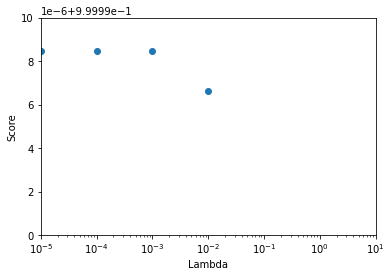

In [ ]:
plt.scatter(lambdas,scores);
plt.xlabel('Lambda');
plt.ylabel('Score');
plt.xscale('log');
plt.xlim([1e-5,10]);
plt.ylim(0.99999,1)

modelo com lambda = 0.001 apresentou maior score

In [ ]:
modelo_final = Ridge(alpha=0.001)
modelo_final.fit(X_Ridge,y_Ridge)

Ridge(alpha=0.001)

In [ ]:
y_pred_Ridge = modelo_final.predict(X_Ridge)

In [ ]:
len(y_pred_Ridge)

3346

In [ ]:
df_final_N = pd.DataFrame(df_N).reset_index().join(pd.DataFrame(y_pred_Ridge, columns = ['pred'])).drop('index',axis=1)

In [ ]:
df_final_N = df_final_N.sort_values(by=['TimeStamp'])

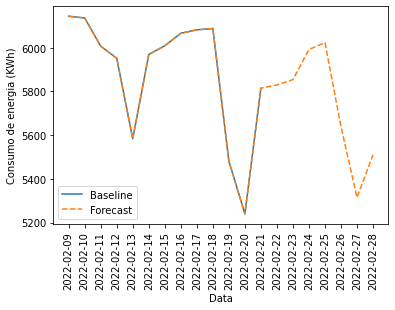

<Figure size 50400x7200 with 0 Axes>

In [ ]:
plt.plot(df_final_N['TimeStamp'][-20:-7],df_final_N['n'][-20:-7])
plt.plot(df_final_N['TimeStamp'][-20:],df_final_N['pred'][-20:],'--')
plt.legend(['Baseline','Forecast'])
plt.xticks(rotation=90)
plt.xlabel('Data')
plt.ylabel('Consumo de energia (KWh)')
plt.figure(figsize=(700,100))
plt.show()
